In [1]:
import numpy as np
import pandas as pd

## TimeStamp Object
Time stamps refer particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

Note: This is Pandas Specific

### Creating TimeStamp Objects

In [3]:
type(pd.Timestamp('2025/11/09'))

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
# Variations
pd.Timestamp('2025-11-09') #using -
pd.Timestamp('2025,11,09') #using ,

Timestamp('2025-09-01 00:00:00')

In [6]:
# Only Year
pd.Timestamp('2025')

Timestamp('2025-01-01 00:00:00')

In [7]:
pd.Timestamp('12th July 2003 9:21PM')

Timestamp('2003-07-12 21:21:00')

In [8]:
# Another Approach
# using datetime.datetime object
import datetime as dt
# Using DateTime python
x = pd.Timestamp(dt.datetime(2023,1,5,9,21,56))
x

Timestamp('2023-01-05 09:21:56')

In [13]:
# Fetching Attributes
print("Day: ",x.day)
print("Month: ",x.month)
print("Year: ",x.year)
print(x.hour)
print(x.minute)
print(x.second)

Day:  5
Month:  1
Year:  2023
9
21
56


### Why separate objects to handle data and time when python already has datetime functionality?
syntax wise datetime is very convenient
But the performance takes a hit while working with huge data. List vs Numpy Array
The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [14]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [15]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### DatetimeIndex Object

A collection of pandas timestamp

In [16]:
# from strings
type(pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1']))

pandas.core.indexes.datetimes.DatetimeIndex

In [17]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,1), dt.datetime(2022,1,1), dt.datetime(2021,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [18]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1), pd.Timestamp(2022,1,1), pd.Timestamp(2021,1,1)])
dt_index

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [19]:
# using datatimeindex as series index
pd.Series([1,2,3],index=dt_index)

2023-01-01    1
2022-01-01    2
2021-01-01    3
dtype: int64

### date_range function

In [20]:
pd.date_range(start='2025/1/12',end = "2025/1/26",freq='D')

DatetimeIndex(['2025-01-12', '2025-01-13', '2025-01-14', '2025-01-15',
               '2025-01-16', '2025-01-17', '2025-01-18', '2025-01-19',
               '2025-01-20', '2025-01-21', '2025-01-22', '2025-01-23',
               '2025-01-24', '2025-01-25', '2025-01-26'],
              dtype='datetime64[ns]', freq='D')

In [21]:
# B -> business days (Monday to Friday)
pd.date_range(start='2025/1/12',end = "2025/1/26",freq='B')

DatetimeIndex(['2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-20', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24'],
              dtype='datetime64[ns]', freq='B')

In [22]:
# W -> one day per week (Default Sunday from each week)
pd.date_range(start='2025/1/12',end = "2025/1/26",freq='W')

DatetimeIndex(['2025-01-12', '2025-01-19', '2025-01-26'], dtype='datetime64[ns]', freq='W-SUN')

In [24]:
pd.date_range(start='2025/1/12',end = "2025/1/26",freq='W-TUE')

DatetimeIndex(['2025-01-14', '2025-01-21'], dtype='datetime64[ns]', freq='W-TUE')

In [25]:
# h -> Hourly data(factor)
pd.date_range(start='2023/1/5', end='2023/2/28', freq='h')

DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 01:00:00',
               '2023-01-05 02:00:00', '2023-01-05 03:00:00',
               '2023-01-05 04:00:00', '2023-01-05 05:00:00',
               '2023-01-05 06:00:00', '2023-01-05 07:00:00',
               '2023-01-05 08:00:00', '2023-01-05 09:00:00',
               ...
               '2023-02-27 15:00:00', '2023-02-27 16:00:00',
               '2023-02-27 17:00:00', '2023-02-27 18:00:00',
               '2023-02-27 19:00:00', '2023-02-27 20:00:00',
               '2023-02-27 21:00:00', '2023-02-27 22:00:00',
               '2023-02-27 23:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=1297, freq='h')

In [26]:
pd.date_range(start='2023/1/5', end='2023/2/28', freq='6h')

DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 06:00:00',
               '2023-01-05 12:00:00', '2023-01-05 18:00:00',
               '2023-01-06 00:00:00', '2023-01-06 06:00:00',
               '2023-01-06 12:00:00', '2023-01-06 18:00:00',
               '2023-01-07 00:00:00', '2023-01-07 06:00:00',
               ...
               '2023-02-25 18:00:00', '2023-02-26 00:00:00',
               '2023-02-26 06:00:00', '2023-02-26 12:00:00',
               '2023-02-26 18:00:00', '2023-02-27 00:00:00',
               '2023-02-27 06:00:00', '2023-02-27 12:00:00',
               '2023-02-27 18:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=217, freq='6h')

In [27]:
# ME -> Month end
pd.date_range(start='2023/1/5', end='2023/2/28', freq='ME')

DatetimeIndex(['2023-01-31', '2023-02-28'], dtype='datetime64[ns]', freq='ME')

In [28]:
# MS -> Month start
pd.date_range(start='2023/1/5',end='2023/2/28',freq='MS')

DatetimeIndex(['2023-02-01'], dtype='datetime64[ns]', freq='MS')

In [29]:
# YE -> Year end
pd.date_range(start='2023/1/5',end='2030/2/28',freq='YE')

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [30]:
# using periods(number of results)
pd.date_range(start='2023/1/5', periods = 25, freq='MS')

DatetimeIndex(['2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01',
               '2024-10-01', '2024-11-01', '2024-12-01', '2025-01-01',
               '2025-02-01'],
              dtype='datetime64[ns]', freq='MS')

### to_datetime function

converts an existing objects to pandas timestamp/datetimeindex object

In [31]:
s = pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
type(s)

pandas.core.series.Series

In [32]:
pd.to_datetime(s).dt.year

0    2023
1    2022
2    2021
dtype: int32

In [34]:
# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s,errors='coerce').dt.month_name() # errors='coerce' -> Ignre the errors

0    January
1    January
2        NaN
dtype: object

## Practice/Hands - on

In [35]:
dataset = "https://drive.google.com/uc?export=download&id=1zLYyjwAY_UcXf9HujKs4DPgdJP6EeXS_"
df = pd.read_csv(dataset)

In [36]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [39]:
df['Date'] = pd.to_datetime(df['Date'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [41]:
df['Date'].dt.month

0       3
1       3
2       3
3       3
4       3
       ..
272    11
273    11
274    11
275    11
276    11
Name: Date, Length: 277, dtype: int32

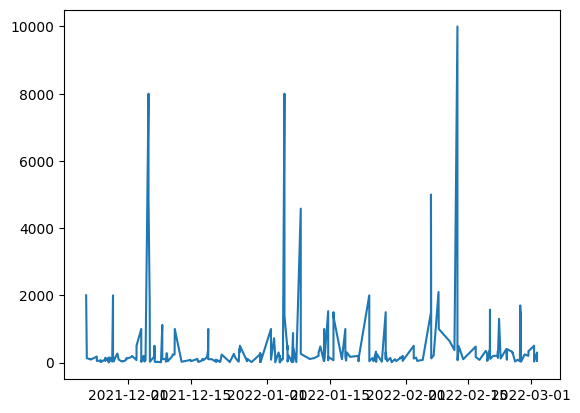

In [42]:
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [43]:
df['day_name'] = df['Date'].dt.day_name()

<Axes: xlabel='day_name'>

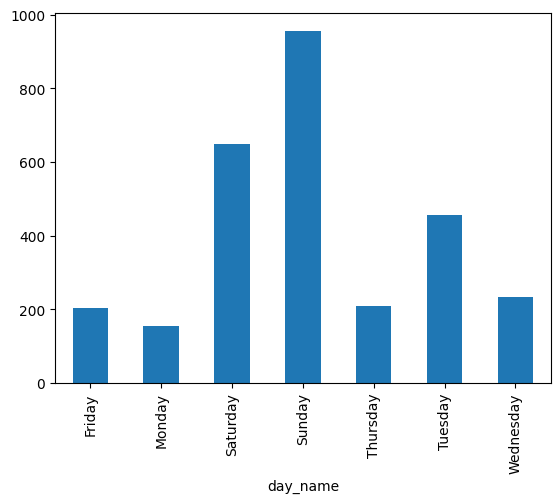

In [44]:
df.groupby('day_name')['INR'].mean().plot(kind='bar')